In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [101]:
train = pd.read_csv('SalaryData_Train(1).csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,19,Private,HS-grad,9.0,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,30.0,United-States,<=50K
811,49,Private,9th,5.0,Divorced,Machine-op-inspct,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
812,32,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Other-relative,White,Male,0.0,0.0,40.0,Philippines,>50K
813,27,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,70.0,United-States,<=50K


In [102]:
test = pd.read_csv('SalaryData_Test(1).csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [103]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [104]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [105]:
train.shape

(815, 14)

In [106]:
test.shape

(15060, 14)

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            815 non-null    int64  
 1   workclass      815 non-null    object 
 2   education      814 non-null    object 
 3   educationno    814 non-null    float64
 4   maritalstatus  814 non-null    object 
 5   occupation     814 non-null    object 
 6   relationship   814 non-null    object 
 7   race           814 non-null    object 
 8   sex            814 non-null    object 
 9   capitalgain    814 non-null    float64
 10  capitalloss    814 non-null    float64
 11  hoursperweek   814 non-null    float64
 12  native         814 non-null    object 
 13  Salary         814 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 89.3+ KB


In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [109]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,815.000000,814.000000,814.000000,814.000000,814.000000
mean,37.687117,10.186732,583.722359,97.604423,40.356265
std,12.930699,2.511380,2486.445768,420.801798,11.689225
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,36.000000,10.000000,0.000000,0.000000,40.000000
75%,46.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,25236.000000,2415.000000,98.000000


In [110]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [111]:
train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.045448,0.093253,0.082678,0.130073
educationno,0.045448,1.000000,0.193016,0.019248,0.225247
capitalgain,0.093253,0.193016,1.000000,-0.054520,0.155703
capitalloss,0.082678,0.019248,-0.054520,1.000000,0.044829
hoursperweek,0.130073,0.225247,0.155703,0.044829,1.000000


In [112]:
test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


In [113]:
lb = LabelEncoder()

In [114]:
train["workclass"] = lb.fit_transform(train["workclass"])
train["education"] = lb.fit_transform(train["education"])
train["maritalstatus"] = lb.fit_transform(train["maritalstatus"])
train["occupation"] = lb.fit_transform(train["occupation"])
train["relationship"] = lb.fit_transform(train["relationship"])
train["race"] = lb.fit_transform(train["race"])
train["sex"] = lb.fit_transform(train["sex"])
train["native"] = lb.fit_transform(train["native"])
train["Salary"] = lb.fit_transform(train["Salary"])

In [115]:
test["workclass"] = lb.fit_transform(test["workclass"])
test["education"] = lb.fit_transform(test["education"])
test["maritalstatus"] = lb.fit_transform(test["maritalstatus"])
test["occupation"] = lb.fit_transform(test["occupation"])
test["relationship"] = lb.fit_transform(test["relationship"])
test["race"] = lb.fit_transform(test["race"])
test["sex"] = lb.fit_transform(test["sex"])
test["native"] = lb.fit_transform(test["native"])
test["Salary"] = lb.fit_transform(test["Salary"])

In [116]:
train = train.iloc[: 2000, :]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            815 non-null    int64  
 1   workclass      815 non-null    int32  
 2   education      815 non-null    int32  
 3   educationno    814 non-null    float64
 4   maritalstatus  815 non-null    int32  
 5   occupation     815 non-null    int32  
 6   relationship   815 non-null    int32  
 7   race           815 non-null    int32  
 8   sex            815 non-null    int32  
 9   capitalgain    814 non-null    float64
 10  capitalloss    814 non-null    float64
 11  hoursperweek   814 non-null    float64
 12  native         815 non-null    int32  
 13  Salary         815 non-null    int32  
dtypes: float64(4), int32(9), int64(1)
memory usage: 60.6 KB


In [117]:
test = test.iloc[: 1300, :]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            1300 non-null   int64
 1   workclass      1300 non-null   int32
 2   education      1300 non-null   int32
 3   educationno    1300 non-null   int64
 4   maritalstatus  1300 non-null   int32
 5   occupation     1300 non-null   int32
 6   relationship   1300 non-null   int32
 7   race           1300 non-null   int32
 8   sex            1300 non-null   int32
 9   capitalgain    1300 non-null   int64
 10  capitalloss    1300 non-null   int64
 11  hoursperweek   1300 non-null   int64
 12  native         1300 non-null   int32
 13  Salary         1300 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 96.6 KB


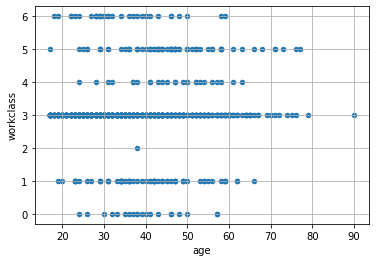

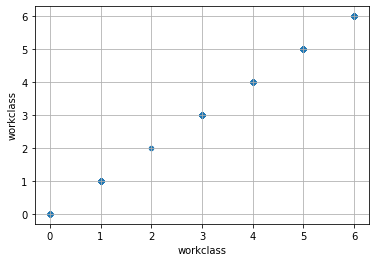

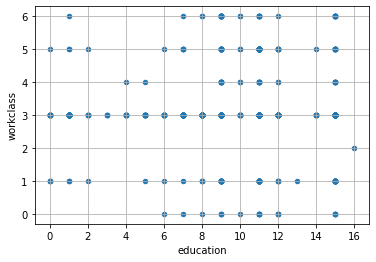

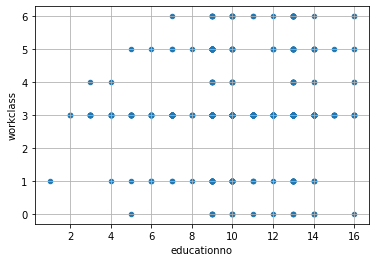

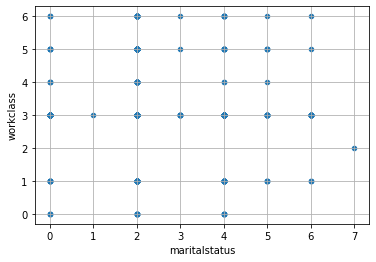

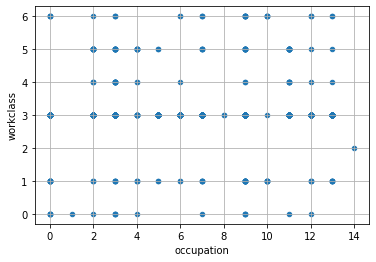

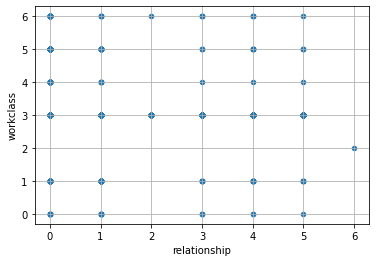

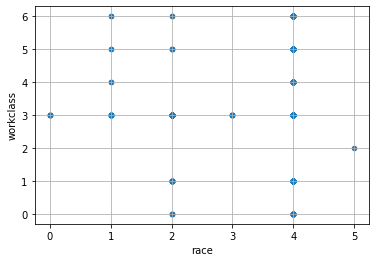

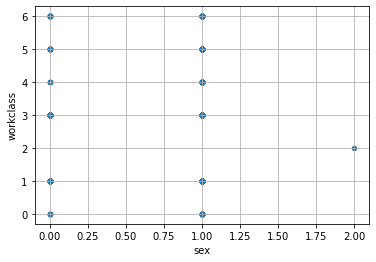

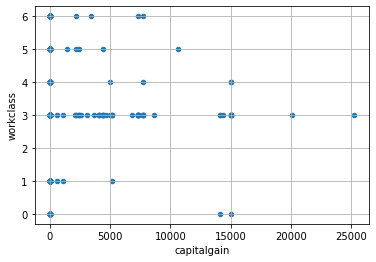

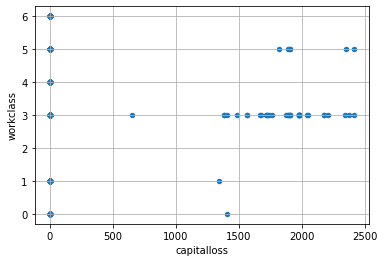

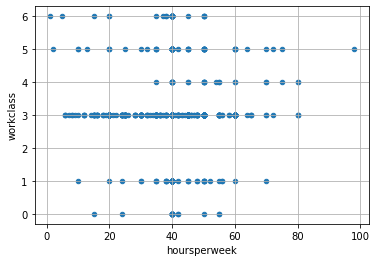

In [118]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'workclass',grid=True)

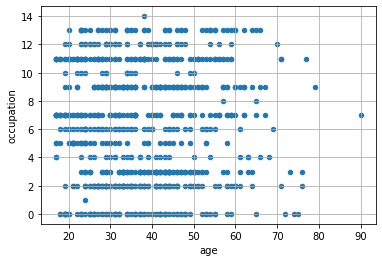

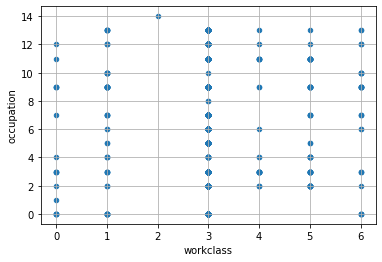

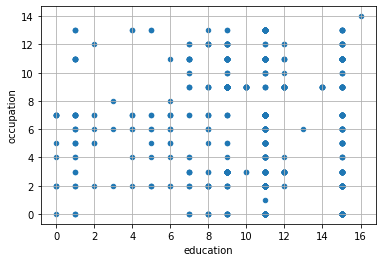

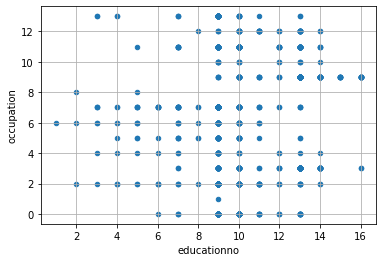

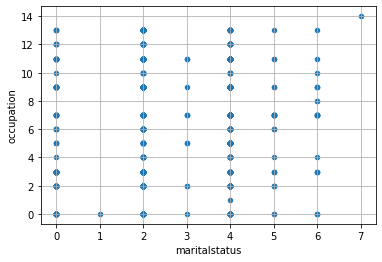

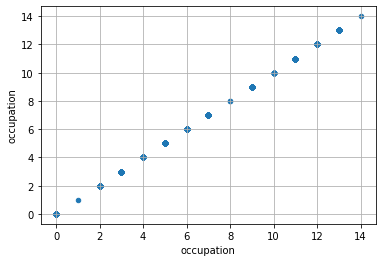

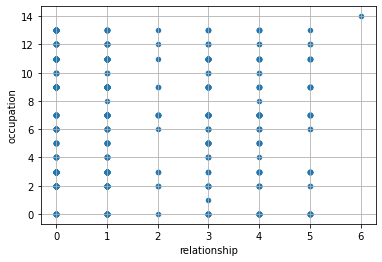

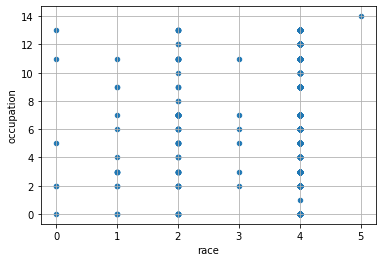

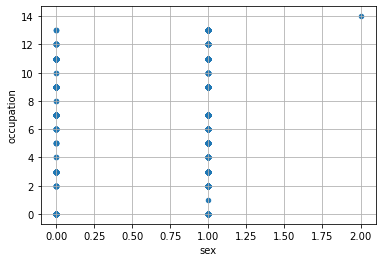

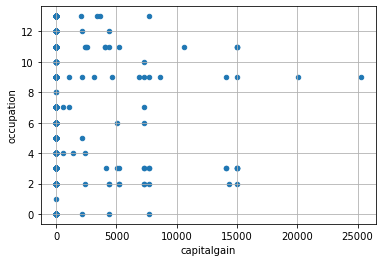

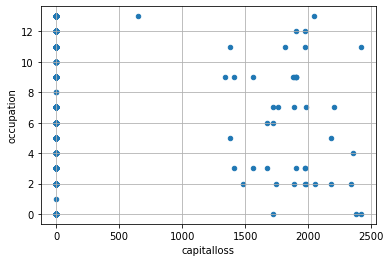

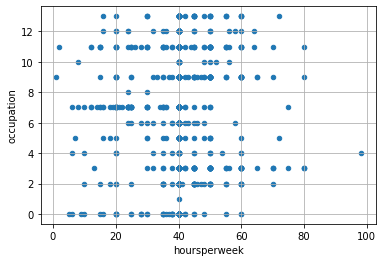

In [119]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'occupation',grid=True)


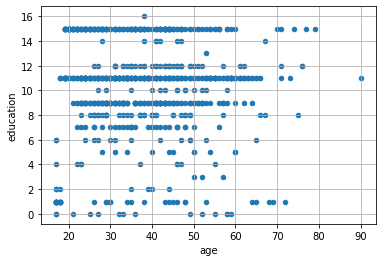

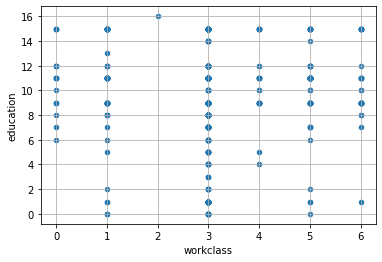

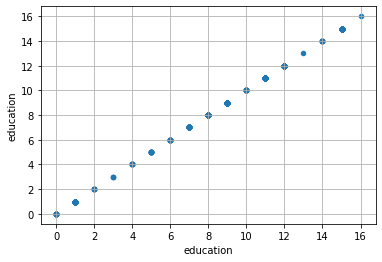

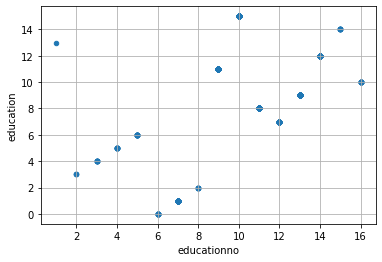

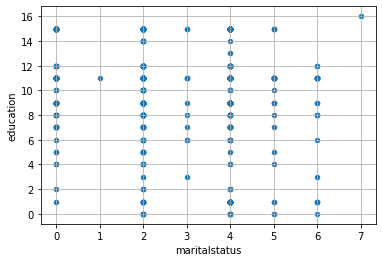

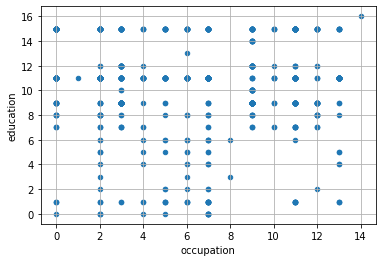

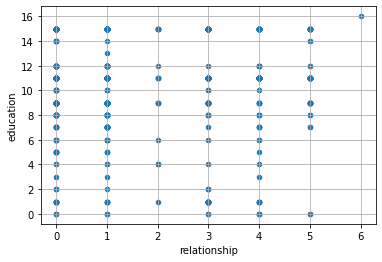

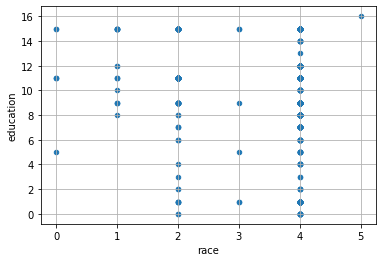

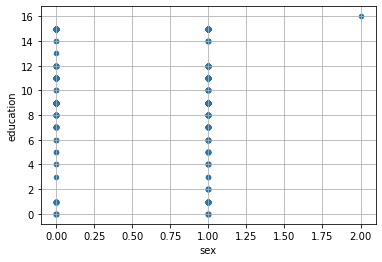

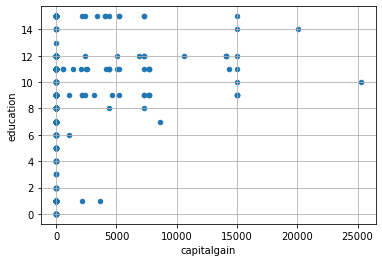

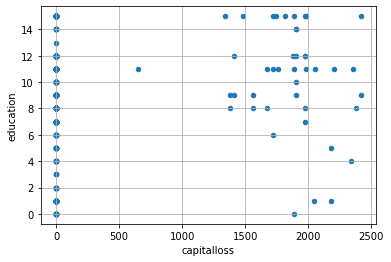

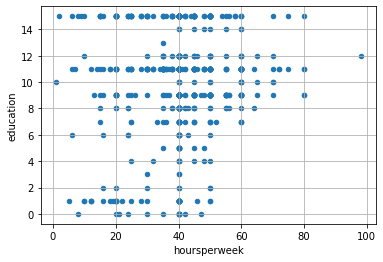

In [120]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'education',grid=True)

In [121]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.047512,-0.008898,0.045448,-0.264618,-0.006440,-0.244906,0.011948,0.068205,0.093253,0.082678,0.130073,-0.014659,0.251577
workclass,0.047512,1.000000,0.000515,0.075204,-0.047737,0.039201,-0.096305,0.052438,0.065001,0.000736,0.026940,0.015996,-0.028087,0.016064
education,-0.008898,0.000515,1.000000,0.304072,-0.110972,-0.022590,-0.022808,-0.033655,-0.013846,0.047123,-0.011806,0.105904,0.107011,0.049744
educationno,0.045448,0.075204,0.304072,1.000000,-0.086603,0.108843,-0.105712,0.073189,0.001356,0.193016,0.019248,0.225247,0.067502,0.339464
maritalstatus,-0.264618,-0.047737,-0.110972,-0.086603,1.000000,0.097945,0.171618,-0.078301,-0.034939,-0.090843,-0.019435,-0.255619,-0.005078,-0.207855
occupation,-0.006440,0.039201,-0.022590,0.108843,0.097945,1.000000,-0.041285,0.075198,0.044005,0.003309,-0.023641,0.018390,0.016684,0.011685
relationship,-0.244906,-0.096305,-0.022808,-0.105712,0.171618,-0.041285,1.000000,-0.071664,-0.532657,-0.089247,-0.045685,-0.288007,-0.037046,-0.194698
race,0.011948,0.052438,-0.033655,0.073189,-0.078301,0.075198,-0.071664,1.000000,0.088369,0.065496,-0.004256,0.064618,0.117641,0.062319
sex,0.068205,0.065001,-0.013846,0.001356,-0.034939,0.044005,-0.532657,0.088369,1.000000,0.019229,0.036909,0.218368,0.003883,0.163622
capitalgain,0.093253,0.000736,0.047123,0.193016,-0.090843,0.003309,-0.089247,0.065496,0.019229,1.000000,-0.054520,0.155703,0.032394,0.331458


In [122]:
test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.132698,-0.058456,-0.028238,-0.299098,-0.035747,-0.253358,0.003103,0.074865,0.107361,0.057418,0.106105,0.018697,0.226220
workclass,0.132698,1.000000,0.068824,0.066220,-0.060726,0.011914,-0.082095,0.065081,0.049687,0.053677,0.062026,0.077106,0.043338,0.077615
education,-0.058456,0.068824,1.000000,0.409201,-0.039852,-0.023030,-0.024427,-0.005501,-0.011597,0.060160,0.038734,0.063598,0.069760,0.119016
educationno,-0.028238,0.066220,0.409201,1.000000,-0.091147,0.077972,-0.050679,0.072135,-0.011529,0.170971,0.111713,0.145317,0.106144,0.313422
maritalstatus,-0.299098,-0.060726,-0.039852,-0.091147,1.000000,-0.012545,0.197796,-0.085572,-0.147099,-0.071843,-0.018926,-0.161722,0.005488,-0.226209
occupation,-0.035747,0.011914,-0.023030,0.077972,-0.012545,1.000000,-0.063657,0.037160,0.073262,0.004247,-0.038230,0.018785,0.004193,0.018910
relationship,-0.253358,-0.082095,-0.024427,-0.050679,0.197796,-0.063657,1.000000,-0.158517,-0.588370,-0.060524,-0.037262,-0.298815,0.015321,-0.259728
race,0.003103,0.065081,-0.005501,0.072135,-0.085572,0.037160,-0.158517,1.000000,0.072954,0.017319,0.064287,0.058017,0.160356,0.076017
sex,0.074865,0.049687,-0.011597,-0.011529,-0.147099,0.073262,-0.588370,0.072954,1.000000,0.070784,0.053486,0.233998,-0.037813,0.206553
capitalgain,0.107361,0.053677,0.060160,0.170971,-0.071843,0.004247,-0.060524,0.017319,0.070784,1.000000,-0.036077,0.128418,0.032191,0.249281


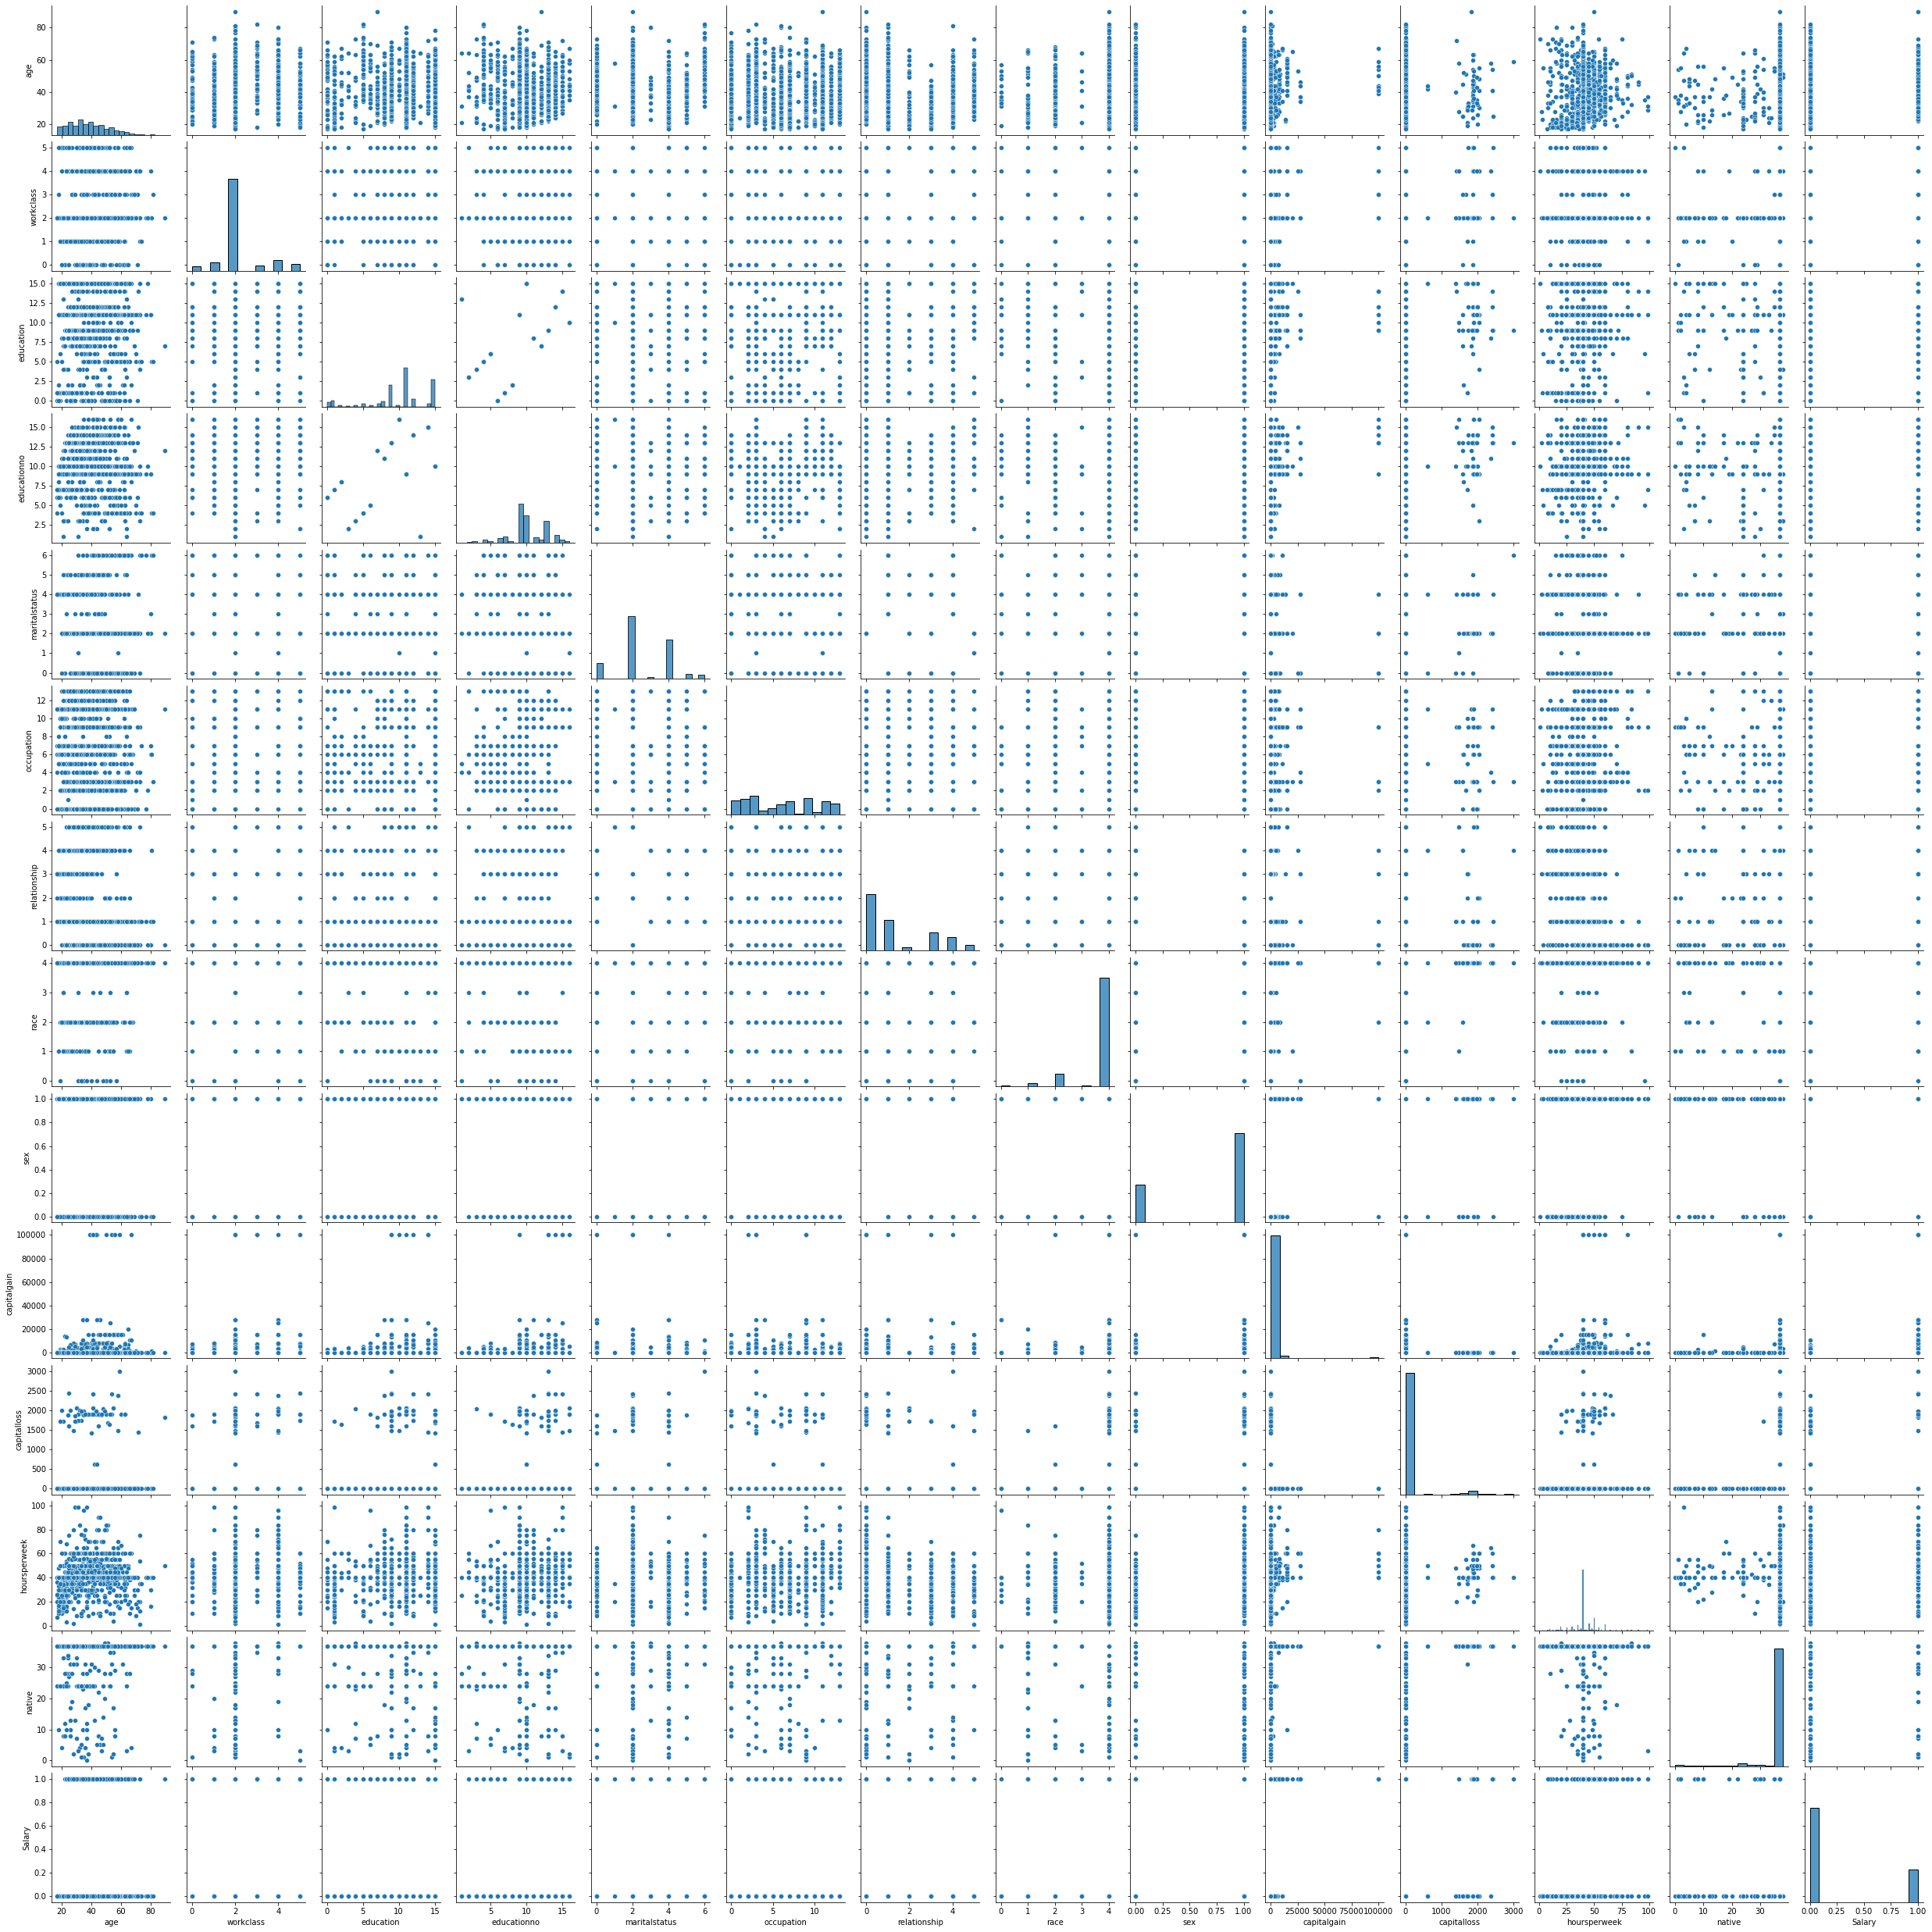

In [123]:
sns.pairplot(test)

In [124]:
X_train=train.iloc[:,:-1]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,6,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,26
1,50,5,9,13.0,2,3,0,4,1,0.0,0.0,13.0,26
2,38,3,11,9.0,0,5,1,4,1,0.0,0.0,40.0,26
3,53,3,1,7.0,2,5,0,2,1,0.0,0.0,40.0,26
4,28,3,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,19,3,11,9.0,4,0,1,4,0,0.0,0.0,30.0,26
811,49,3,6,5.0,0,6,1,4,0,0.0,0.0,40.0,26
812,32,3,9,13.0,2,0,2,4,1,0.0,0.0,40.0,20
813,27,3,11,9.0,2,2,0,4,1,0.0,0.0,70.0,26


In [125]:
y_train=train.iloc[:,-1]
y_train

0      0
1      0
2      0
3      0
4      0
      ..
810    0
811    0
812    1
813    0
814    2
Name: Salary, Length: 815, dtype: int32

In [126]:
X_test=test.iloc[:,:-1]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,66,4,15,10,2,13,0,2,1,0,0,60,37
1296,40,2,15,10,4,2,2,0,1,0,0,30,37
1297,37,2,4,3,2,6,0,4,1,0,0,40,7
1298,34,2,9,13,2,11,0,4,1,0,0,40,37


In [127]:
y_test = test.iloc[:,-1]
y_test

0       0
1       0
2       1
3       1
4       0
       ..
1295    0
1296    0
1297    0
1298    0
1299    0
Name: Salary, Length: 1300, dtype: int32

In [128]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((815, 13), (815,), (1300, 13), (1300,))

In [129]:
# SVM Model

In [137]:
X_train1=X_train.fillna(0)

In [138]:
X_train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,6,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,26
1,50,5,9,13.0,2,3,0,4,1,0.0,0.0,13.0,26
2,38,3,11,9.0,0,5,1,4,1,0.0,0.0,40.0,26
3,53,3,1,7.0,2,5,0,2,1,0.0,0.0,40.0,26
4,28,3,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,19,3,11,9.0,4,0,1,4,0,0.0,0.0,30.0,26
811,49,3,6,5.0,0,6,1,4,0,0.0,0.0,40.0,26
812,32,3,9,13.0,2,0,2,4,1,0.0,0.0,40.0,20
813,27,3,11,9.0,2,2,0,4,1,0.0,0.0,70.0,26


In [139]:
model = SVC()

model.fit(X_train1, y_train)


SVC()

In [140]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
print(confusion_matrix(y_test, y_pred))

[[961   5]
 [267  67]]


In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88       966
           1       0.93      0.20      0.33       334

    accuracy                           0.79      1300
   macro avg       0.86      0.60      0.60      1300
weighted avg       0.82      0.79      0.74      1300



In [143]:
param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}

In [144]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)

In [148]:
grid.fit(X_train1, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.761 total time=   0.0s


C:\Users\Gopi Narukulla\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.773 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.785 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.785 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.785 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.779 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.779 total time=   0.0s
[CV 1/5] END ......C=1, gamm

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [149]:
grid.best_params_

{'C': 20, 'gamma': 0.001, 'kernel': 'rbf'}

In [150]:
grid_pred = grid.predict(X_test)

In [151]:
grid_pred

array([0, 0, 0, ..., 0, 0, 0])

In [152]:
print(confusion_matrix(y_test, grid_pred))

[[901  65]
 [190 144]]


In [153]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       966
           1       0.69      0.43      0.53       334

    accuracy                           0.80      1300
   macro avg       0.76      0.68      0.70      1300
weighted avg       0.79      0.80      0.79      1300



In [ ]:
# So, using grid search method, we improved our model accuracy from 0.79 to 0.83